In [ ]:
!pip install sentencepiece

In [1]:
from ultralytics import YOLO
import cv2
from PIL import Image
import numpy as np
from datetime import datetime
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import torch

C:\Users\2411c\anaconda3\envs\mini\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model=YOLO("model/number_plate_detect/best.pt")


In [3]:
now=datetime.now()
str(now.strftime("%Y%m%d%H%M%S"))

'20240806080906'

In [4]:
def get_plate(images):
    
    results=model.predict(images,show_boxes=True,save=False,conf=0.25)
    rs=[]
    for result in results:
        for box in result.boxes:
            left, top, right, bottom = np.array(box.xyxy.cpu(), dtype=np.int32).squeeze()
            region=result.orig_img[top: bottom,left:right]
            now=datetime.now()
            filename="results/result"+str(now.strftime("%Y%m%d%H%M%S"))+"_"+str(len(rs))+".png"
            print(filename)
            cv2.imwrite(filename,region)
            
            rs.append(region)

    return rs

    

In [5]:
r=get_plate("test_img/")


image 1/33 C:\Users\2411c\Desktop\mini\test_img\Datacluster_number_plates (16).jpg: 256x320 1 Plate, 155.6ms
image 2/33 C:\Users\2411c\Desktop\mini\test_img\Datacluster_number_plates (22).jpg: 320x256 1 Plate, 143.0ms
image 3/33 C:\Users\2411c\Desktop\mini\test_img\Datacluster_number_plates (4).jpg: 320x160 1 Plate, 129.0ms
image 4/33 C:\Users\2411c\Desktop\mini\test_img\Datacluster_number_plates (49).jpg: 320x256 1 Plate, 140.6ms
image 5/33 C:\Users\2411c\Desktop\mini\test_img\Datacluster_number_plates (53).jpg: 320x256 2 Plates, 142.5ms
image 6/33 C:\Users\2411c\Desktop\mini\test_img\Datacluster_number_plates (80).jpg: 320x256 1 Plate, 162.2ms
image 7/33 C:\Users\2411c\Desktop\mini\test_img\Datacluster_number_plates (95).jpg: 320x256 1 Plate, 166.2ms
image 8/33 C:\Users\2411c\Desktop\mini\test_img\Datacluster_number_plates (96).jpg: 320x224 2 Plates, 146.4ms
image 9/33 C:\Users\2411c\Desktop\mini\test_img\N1.jpeg: 192x320 1 Plate, 121.3ms
image 10/33 C:\Users\2411c\Desktop\mini\test

In [6]:
len(r)

38

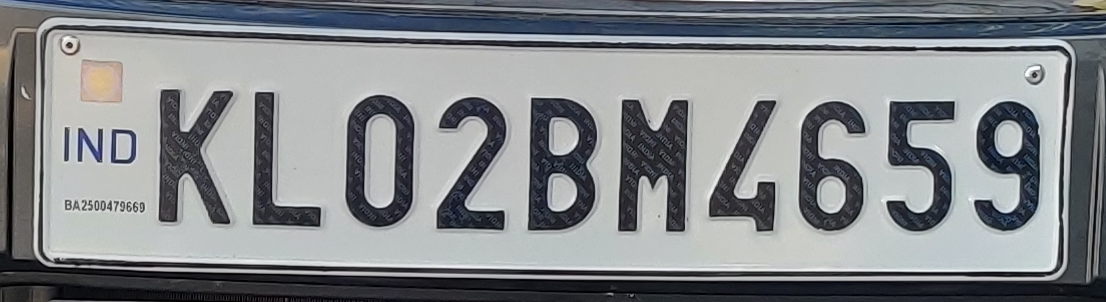

In [7]:
Image.fromarray(cv2.cvtColor(r[0],cv2.COLOR_BGR2RGB))

In [8]:
import torch_directml


In [9]:

processor = TrOCRProcessor.from_pretrained('microsoft/trocr-small-printed')

KeyboardInterrupt: 

In [4]:
ocr_model =  VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-small-printed')

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-small-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [5]:
ocr_model.save_pretrained("model/vit_ocr/trocr-small-pretrained")

In [3]:
processor.save_pretrained("model/vit_ocr/trocr-small-pretrained")

[]

In [9]:
ocr_model =  VisionEncoderDecoderModel.from_pretrained("model/vit_ocr/trocr-small-pretrained")
processor = TrOCRProcessor.from_pretrained("model/vit_ocr/trocr-small-pretrained")

In [10]:

def extract_text(img):

    
    image = Image.fromarray(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    
    pixel_values = processor(image, return_tensors="pt").pixel_values

    if torch.cuda.is_available():#NVIDIA GPU
        device = torch.device("cuda:0")
    elif torch_directml.device():#FOR AMD GPU
        device=torch_directml.device()
    else:#FOR CPU
        device=torch.device("cpu")
    
        
    pixel_values = pixel_values.to(device)
    ocr_model.to(device)
    
    generated_ids = ocr_model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    
    number_plate=""
    for ch in generated_text:
        if ch.isalnum():
            number_plate+=ch
    print(number_plate)
    return number_plate

In [11]:
extract_text(r[0])

C:\Users\2411c\anaconda3\envs\mini\lib\site-packages\transformers\generation\utils.py:1513: UserWarning: The operator 'aten::isin.Tensor_Tensor_out' is not currently supported on the DML backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at D:\a\_work\1\s\pytorch-directml-plugin\torch_directml\csrc\dml\dml_cpu_fallback.cpp:17.)
  if eos_token_id is not None and torch.isin(elements=eos_token_id, test_elements=pad_token_id).any():
C:\Users\2411c\anaconda3\envs\mini\lib\site-packages\transformers\generation\utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


KL02BM4659


'KL02BM4659'

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

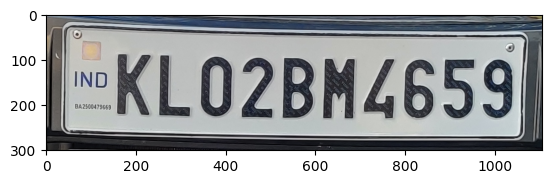

KL02BM4659


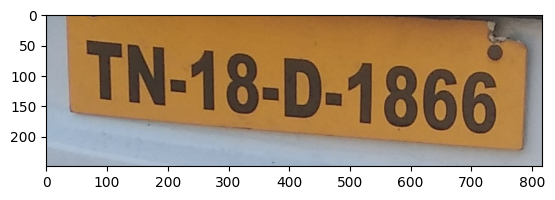

IN18D1866


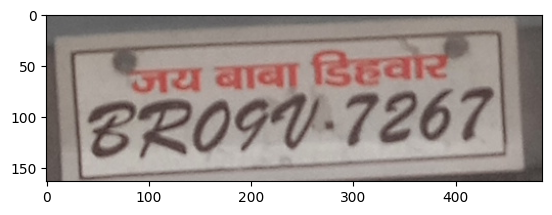

820977267


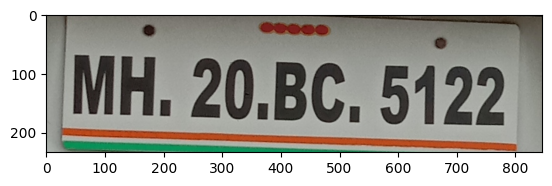

MH20BC5122


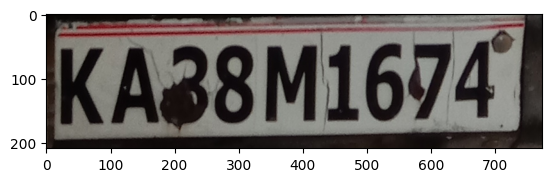

KA88M1694


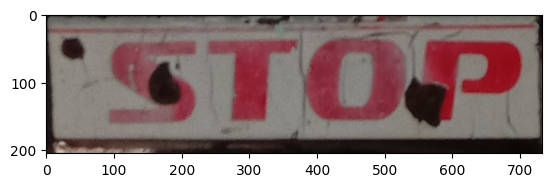

STOR


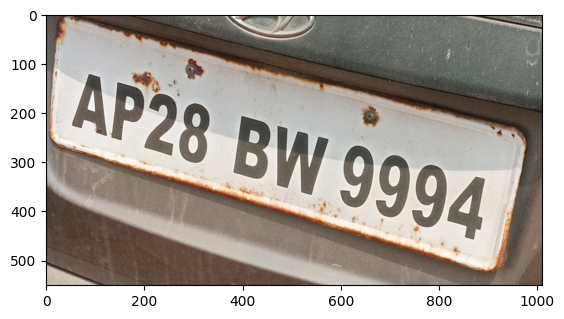

AP28BW99941


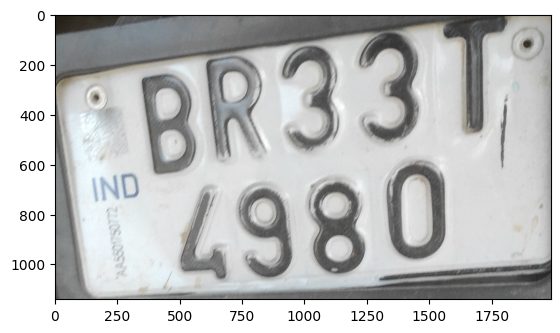

PER3341


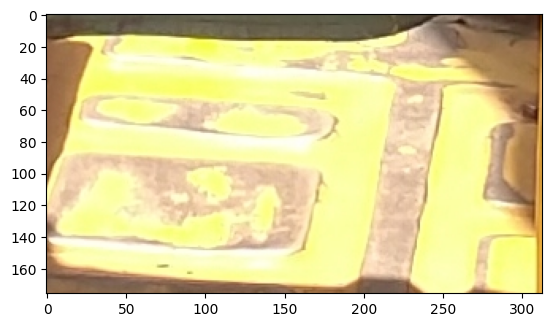

ET


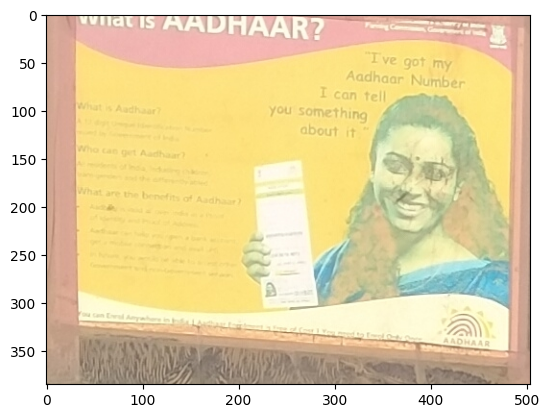

DATE


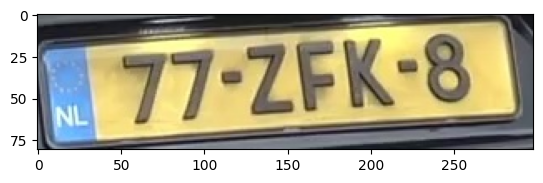

77ZEK8


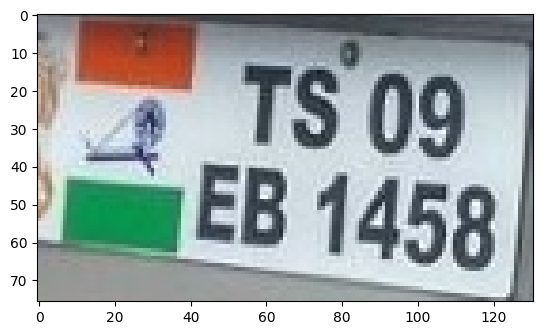

250


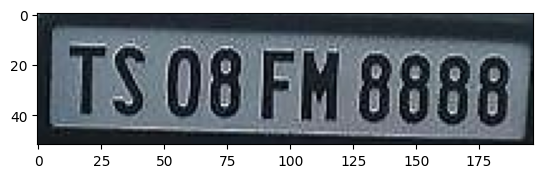

TS08FM8888


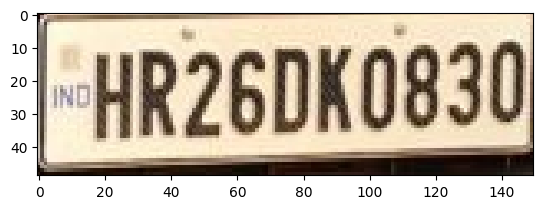

HR26DK0830


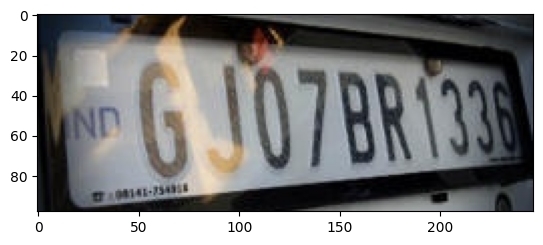

GSTGJ07BR1338


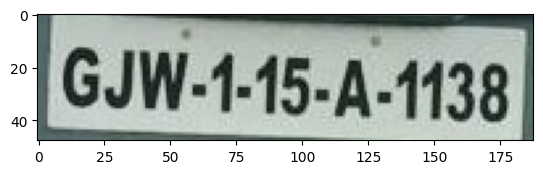

GJW115A1138


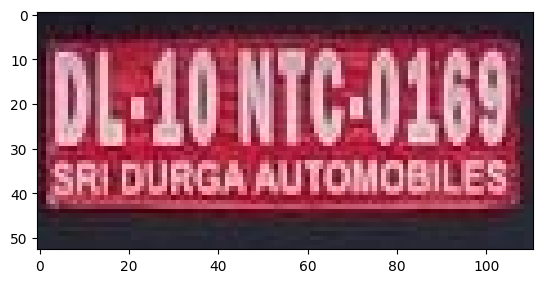

PL10NTG0469


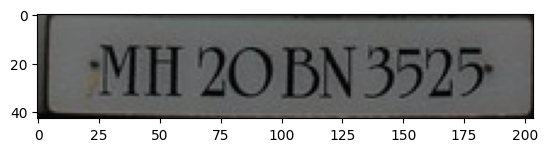

MH20BN3525


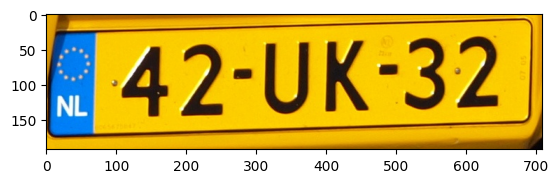

TOTAL


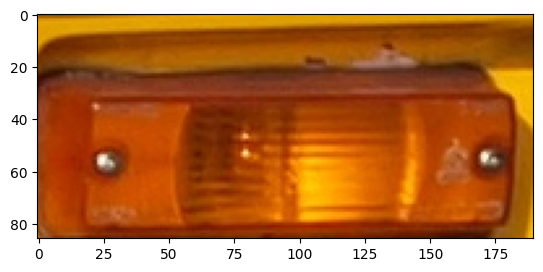

IT


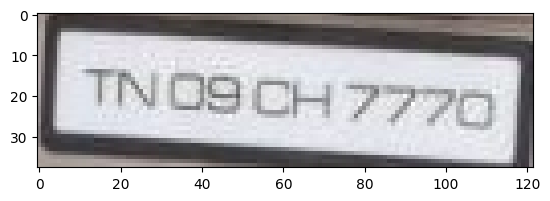

TN09CH770


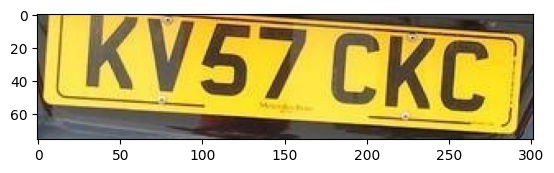

LVLRM


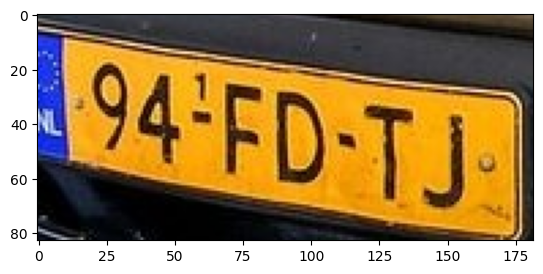

CARDID


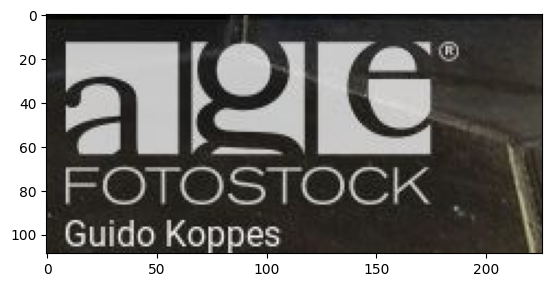

AISIC


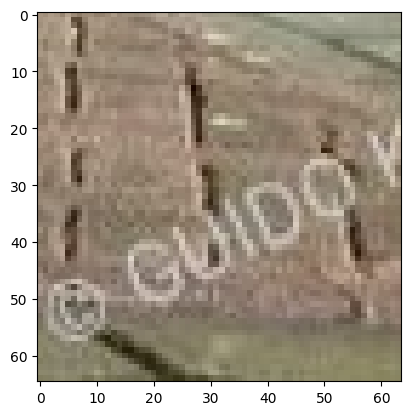

REFIER


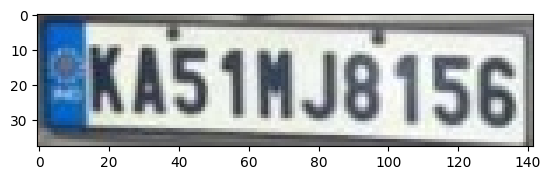

KA51MJ8156


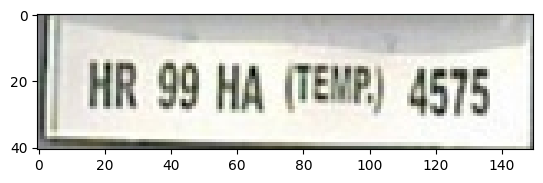

HR99HATEMP4575


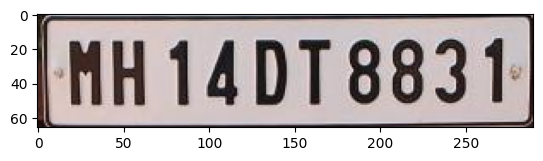

MH14DT8831


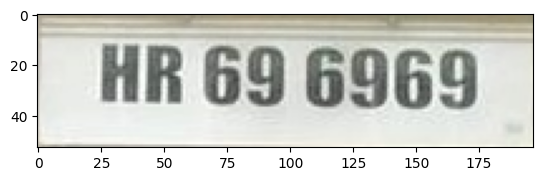

HR696969


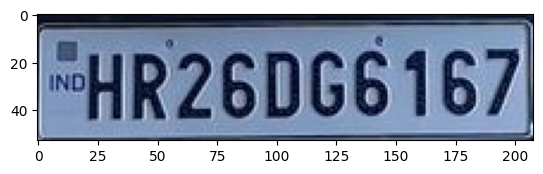

EHR26DG6167


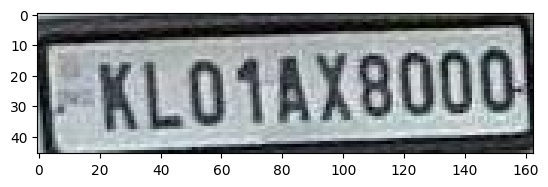

KL01AX8000


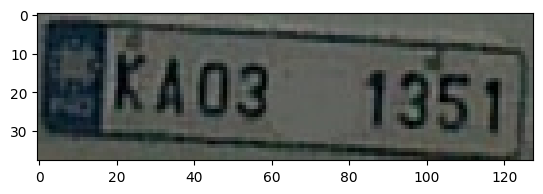

KA031351


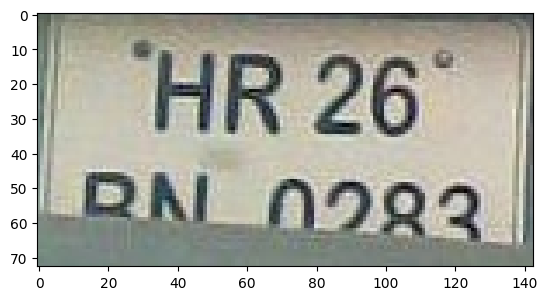

PHD262


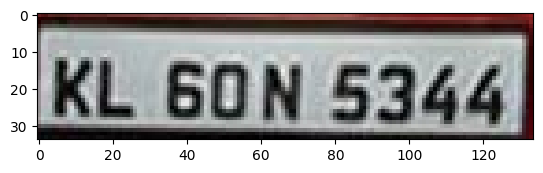

KL60N5344


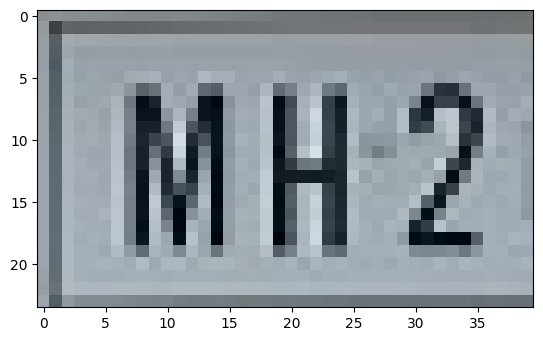

MH2


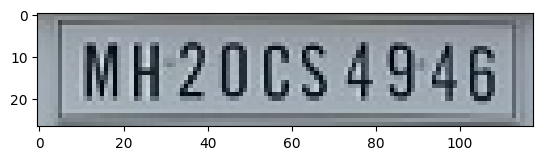

MH20CS4946


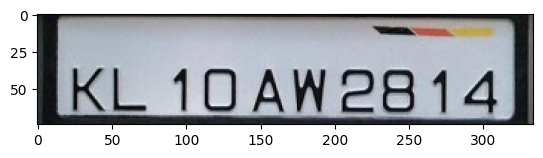

KL10AW2814


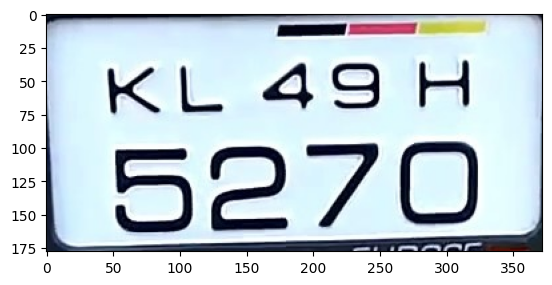

270
0:00:16.143897


In [13]:
time=datetime.now()
for np in r:
    im=Image.fromarray(cv2.cvtColor(np,cv2.COLOR_BGR2RGB))
    plt.imshow(im)
    plt.show()
    extract_text(np)
print(datetime.now()-time)

In [19]:
#Speed: 1.2ms preprocess, 145.6ms inference, 0.5ms postprocess per image at shape (1, 3, 192, 320)
time_yolo=1.2+145+0.5
time_ocr=16.143897/38*1000 # for ms
avg_time=time_yolo+time_ocr
print(f"Average time taken for plate detection and character recognition: {avg_time} ms(millisecond)")

Average time taken for plate detection and character recognition: 571.539394736842 ms(millisecond)
